IBM Capstone Project: The Battle of the Neighborhoods
Open new Italian Restaurant in vadodara, india
Introduction
In this project, I will determine which place is good for opening Italian Restaurant in vadodara.

I will convert address data into their equivalent latitude and longitude values.
For vadodara neighborhood data, I will use wikipedia.
I will use the Foursquare API to explore vadodara neighborhoods and to get venues in neighborhoods.
I will use the Foursquare API to get venue ratings and likes in neighborhoods.
I will use the k-means clustering and Agglomerative algorithms to complete clustering task
I will use the Folium library to visualize the neighborhoods, venues , clusters in vadodara

<b>1. Download and Explore Neigborhood Dataset
Import Libraries

In [1]:
#install libraries 
!pip install geopy    
!pip install folium   
!pip install geocoder


     |████████████████████████████████| 92kB 9.1MB/s  eta 0:00:01
     |████████████████████████████████| 102kB 15.8MB/s ta 0:00:01


In [2]:
#import libraries 
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt # for graphical usage 

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library
from folium import plugins
from folium.plugins import HeatMap

# main documentation page: http://beautiful-soup-4.readthedocs.io/en/latest/
# how to use the BeautifulSoup package: https://www.youtube.com/watch?v=ng2o98k983k video
from bs4 import BeautifulSoup 
import pandas as pd
import requests

print('Libraries imported.')

Libraries imported.


<b># get coordinates of vadodara

In [10]:

vadodara_address = 'Vadodara, india'

geolocator = Nominatim(user_agent="vadodara_explorer")
location = geolocator.geocode(vadodara_address)
latitude = location.latitude
longitude = location.longitude
braila_center = [latitude, longitude ]
print('The geograpical coordinate of {} are {}, {}.'.format(vadodara_address, latitude, longitude))

The geograpical coordinate of Vadodara, india are 22.2973142, 73.1942567.


<b># get neighbourhood in vadodara

In [11]:
url = "https://en.wikipedia.org/wiki/Category:Districts of Bucharest"
source = requests.get(url).text
soup = BeautifulSoup(source,'lxml')

neighborhoodList = []

# append the data into the list
for row in soup.find_all("div", class_="mw-category")[0].findAll("li"):
    neighborhoodList.append(row.text.replace(', Vadodara',''))
    
df_neighborhood = pd.DataFrame({"Neighborhood": neighborhoodList})
print("There are {} neighborhoods in {}".format(df_neighborhood.shape[0], vadodara_address))

There are 40 neighborhoods in Vadodara, india


<b>#get sectors and popular sectors

In [15]:
url = "https://en.wikipedia.org/wiki/Sectors of Bucharest"
source = requests.get(url).text
soup = BeautifulSoup(source,'lxml')

sectorPopList = []
sectorPopulationList = []

for row in soup.find_all("tbody"):
    header = str(row.findAll("th"))
    if "Population (October 2011)" in header:
        i = 0
        for td in row.find_all("td"):
            i+=1
            if i==2: 
                sectorPopList.append(td.text.replace("\n",""))
            if i==3: 
                sectorPopulationList.append(td.text.replace("\n",""))    
                i=0

df_sectorPop = pd.DataFrame({"Sector": sectorPopList, "Population": sectorPopulationList})

sectorNeigList =[]
sectorNeigborList =[]

for row in soup.find_all("ul"):
    if sectorPopList[0] in  row.text:
        for s in row.text.split("\n"):
            sectorNeigList.append(s.split(":")[0])
            sectorNeigborList.append(s.split(":")[1])
    
df_sector= pd.DataFrame({"Sector": sectorNeigList, "Neigborhoods": sectorNeigborList}).merge(df_sectorPop,on='Sector' )

print("There are {} Sector in {}".format(df_sector.shape[0], vadodara_address))
df_sector


There are 6 Sector in Vadodara, india


,Sector,Neigborhoods,Population
0,Sector 1,"Dorobanți, Băneasa, Aviației, Pipera, Aviator...","225,454"
1,Sector 2,"Pantelimon, Colentina, Iancului, Tei, Floreas...","345,370"
2,Sector 3,"Vitan, Dudești, Titan, Centrul Civic, Balta A...","385,439"
3,Sector 4,"Berceni, Olteniței, Văcărești, Timpuri Noi, T...","287,828"
4,Sector 5,"Rahova, Ferentari, Giurgiului, Cotroceni, 13 ...","271,575"
5,Sector 6,"Giulești, Crângași, Drumul Taberei, Militari,...","367,760"


<B>#set sectors before neighbourhood

In [16]:
def getSector(row):
    for i in range(df_sector.shape[0]):
        if row["Neighborhood"] in  df_sector.iloc[i].Neigborhoods:
            return pd.Series([df_sector.iloc[i].Sector, df_sector.iloc[i].Population], index = ['Sector','SectorPopulation'])

df_neighborhood[["Sector","SectorPopulation"]] =df_neighborhood.apply(getSector, axis=1)
df_neighborhood.head(5)

,Neighborhood,Sector,SectorPopulation
0,Aviației,Sector 1,"225,454"
1,"Băneasa, Bucharest",None,None
2,"Berceni, Bucharest",None,None
3,Bucureștii Noi,Sector 1,"225,454"
4,Centrul Civic,Sector 3,"385,439"


<b>Get geographical coordinates of neighborhoods
I use python geocoder library to get geograpical coordinates of neighborhoods

In [22]:
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, {}'.format(neighborhood,vadodara_address))
        lat_lng_coords = g.latlng
    return lat_lng_coords

coords = [ get_latlng(neighborhood) for neighborhood in df_neighborhood["Neighborhood"].tolist() ]

df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

# merge the coordinates into the original dataframe
df_neighborhood['Latitude'] = df_coords['Latitude']
df_neighborhood['Longitude'] = df_coords['Longitude']
print("Geographical coordinates of five neighborhoods are as below")
df_neighborhood.head()

Geographical coordinates of five neighborhoods are as below


,Neighborhood,Sector,SectorPopulation,Latitude,Longitude
0,Aviației,Sector 1,"225,454",22.30946,73.17993
1,"Băneasa, Bucharest",None,None,21.97770,73.16766
2,"Berceni, Bucharest",None,None,21.97770,73.16766
3,Bucureștii Noi,Sector 1,"225,454",22.30946,73.17993
4,Centrul Civic,Sector 3,"385,439",22.31044,73.16628


<b>Create vadodara map with neighborhoods superimposed
Let's see locations of neighborhoods on map. In here, I use folium library to draw map

In [24]:
map_vadodara= folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng,  neighborhood in zip(df_neighborhood['Latitude'], df_neighborhood['Longitude'], df_neighborhood['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_vadodara)  
    
map_vadodara

<b>2. Load Venues and Analyze Neighborhoods in vadodara
    
We will use Foursquare API for getting venues of neighborhoods

Explore Venues of vadodara neighborhoods
I get venue list with 1 km distance to neighborhood's center

In [48]:
# @hidden_cell
CLIENT_ID = 'HRMBKZUASN1NWO005IQK4TGG15UVEY5GCLJCYXHXW0VDP00K' # your Foursquare ID
CLIENT_SECRET = 'JSXFO23NR2OMICQSZRFQYDAZG1GMNRALXXACAFVNF5CGAM4C' # your Foursquare Secret
VERSION = '20180604'
limit = 20
print('Your credentails:')
print('CLIENT_ID:'+ CLIENT_ID)
print('CLIENT_SECRET:'+ CLIENT_SECRET)

Your credentails:
CLIENT_ID:HRMBKZUASN1NWO005IQK4TGG15UVEY5GCLJCYXHXW0VDP00K
CLIENT_SECRET:JSXFO23NR2OMICQSZRFQYDAZG1GMNRALXXACAFVNF5CGAM4C


In [26]:
LIMIT = 100

def getNeighborhoodVenues( latitude, longitude,neighborhood, radius=1000 ):
    venues = []
    for lat, long, neighborhood in zip(latitude, longitude ,neighborhood):

        # create the API request URL
        url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            long,
            radius, 
            LIMIT)

        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']

        # return only relevant information for each nearby venue
        for venue in results:
            venues.append((
                neighborhood,
                lat, 
                long, 
                venue['venue']['name'], 
                venue['venue']['id'], 
                venue['venue']['location']['lat'], 
                venue['venue']['location']['lng'],  
                venue['venue']['location']['distance'],  
                venue['venue']['categories'][0]['name']))
    
    # convert the venues list into a DataFrame
    venues = pd.DataFrame(venues)
    # define the column names
    venues.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueId', 'VenueLatitude', 'VenueLongitude','VenueDistance','VenueCategory']
            
    return venues 

neighborhood_venues = getNeighborhoodVenues (df_neighborhood['Latitude'], df_neighborhood['Longitude'], df_neighborhood['Neighborhood'] )

print('There are {} unique venue categories. Some of them are as below:'.format(len(neighborhood_venues['VenueCategory'].unique())))
neighborhood_venues.head()


There are 39 unique venue categories. Some of them are as below:


,Neighborhood,Latitude,Longitude,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory
0,Aviației,22.30946,73.17993,Crossword,4bd54a6d6f649521bbe16eec,22.313745,73.174971,698,Bookstore
1,Aviației,22.30946,73.17993,That Place,4e9d9c3c0aaf015a06083907,22.308334,73.176072,416,Italian Restaurant
2,Aviației,22.30946,73.17993,San's Sizzlers,4d404b94915a37049901147f,22.309544,73.175179,489,Italian Restaurant
3,Aviației,22.30946,73.17993,Surya Palace Hotel,4e8702226d86aab5c5956597,22.307101,73.183943,489,Indian Restaurant
4,Aviației,22.30946,73.17993,Barbeque Nation,4cc007f2985aa35dcc504a12,22.310547,73.170936,934,BBQ Joint


In [27]:
print('Top 10 distinct venue counts are as below')
neighborhood_venues[['VenueId','VenueCategory']].drop_duplicates().groupby('VenueCategory').count()[['VenueId']].rename(columns={"VenueId": "Count"}).sort_values(by=['Count'], ascending=False)[:10]

Top 10 distinct venue counts are as below


,Count
VenueCategory,
Indian Restaurant,14
Café,5
Italian Restaurant,4
Snack Place,4
Multiplex,4
Pizza Place,4
Fast Food Restaurant,4
BBQ Joint,3
Shopping Mall,3


In [28]:
restaurant_list =['Indian Restaurant', 'Italian Restaurant','Café','Snack Place','Pizza Place','Fast Food Restaurant','BBQ Joint','Restaurant']
Italian_restaurant_list = ['Italian Restaurant', 'Restaurant']

# Filter restaurants 
    
neighborhood_venues['RestFlag']=False
for restCat in restaurant_list:
    neighborhood_venues['RestFlag'] = neighborhood_venues['RestFlag'] | neighborhood_venues['VenueCategory'].str.contains(restCat)
    
neighborhood_restaurants = neighborhood_venues[neighborhood_venues['RestFlag'] == True].iloc[:,:-1]
Italian_restaurants = neighborhood_restaurants[ neighborhood_restaurants['VenueCategory'].isin(Italian_restaurant_list) ]
other_restaurants = neighborhood_restaurants[ ~neighborhood_restaurants['VenueCategory'].isin(Italian_restaurant_list) ]

print('Total number of restaurants:', len(neighborhood_restaurants['VenueId'].unique()))
print('Total number of Italian restaurants:', len(Italian_restaurants['VenueId'].unique()))
print('Percentage of Italian restaurants: {:.2f}%'.format(len(Italian_restaurants['VenueId'].unique()) / len(neighborhood_restaurants['VenueId'].unique()) * 100))


Total number of restaurants: 46
Total number of Italian restaurants: 6
Percentage of Italian restaurants: 13.04%


0 neighborhoods do not have any Italian restaurant


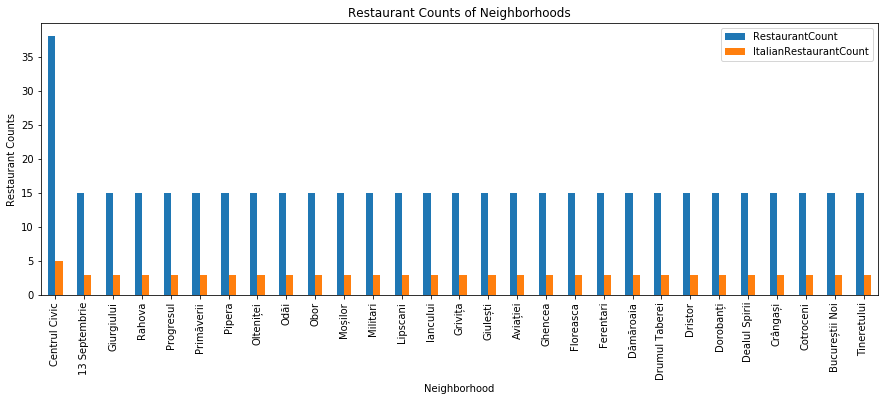

In [30]:
# get counts of restaurants in each Neighborhood
df_rest_counts =  neighborhood_restaurants.groupby(['Neighborhood']).count().rename(columns={"VenueCategory": "RestaurantCount"})[['RestaurantCount']]

#find neighborhoods that does not have any restaurant 
noRestList = list(set(neighborhood_venues['Neighborhood']) - set(neighborhood_restaurants['Neighborhood']))

#if exists , append neighborhoods without any restaurant to df_rest_counts
if noRestList != []:
    df_rest_counts = df_rest_counts.append (pd.DataFrame( {'Neighborhood' : noRestList  , 'RestaurantCount': [0] * len(noRestList) } ).set_index('Neighborhood'))

df_rest_counts.reset_index(inplace=True)

#####
# get counts of Turkish restaurants in each Neighborhood
df_Italian_rest_counts =  Italian_restaurants.groupby(['Neighborhood']).count().rename(columns={"VenueCategory": "ItalianRestaurantCount"})[['ItalianRestaurantCount']]

#find neighborhoods that does not have any restaurant 
noRestList = list(set(neighborhood_venues['Neighborhood']) - set(Italian_restaurants['Neighborhood']))

#if exists , append neighborhoods without any restaurant to df_rest_counts
if noRestList != []:
    df_Italian_rest_counts = df_Italian_rest_counts.append (pd.DataFrame( {'Neighborhood' : noRestList  , 'ItalianRestaurantCount': [0] * len(noRestList) } ).set_index('Neighborhood'))

df_Italian_rest_counts.reset_index(inplace=True)
df_rest_counts= df_rest_counts.merge(df_Italian_rest_counts).set_index('Neighborhood')
df_rest_counts= df_rest_counts.sort_values(by=['RestaurantCount'],ascending =False)

print('{} neighborhoods do not have any Italian restaurant'.format(len(noRestList)))
######
#Draw graph
df_rest_counts[['RestaurantCount','ItalianRestaurantCount']].plot(kind='bar',figsize=(15,5))
plt.title('Restaurant Counts of Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Restaurant Counts')
plt.show()


Get the restaurant's overall rating
I used Foursquare API for getting likes and rates of restaurants

In [31]:
def getVenueRaitings(venues):
    
    raitings = []
    likes =[]
    for venueId in venues:

        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venueId, CLIENT_ID, CLIENT_SECRET, VERSION)
        result = requests.get(url).json()
        try:
            rating = result['response']['venue']['rating']
            likes = result['response']['venue']['likes']['count']
        except:
            rating = None
            likes = None
        
        raitings.append((venueId, rating,likes))
 
    # convert the venues list into a DataFrame
    rating = pd.DataFrame(raitings)
    # define the column names
    rating.columns = ['VenueId', 'VenueRating','VenueLikes']

    return rating    

restaurants_raitings = getVenueRaitings(neighborhood_restaurants['VenueId'].drop_duplicates())
restaurants_raitings.head()

,VenueId,VenueRating,VenueLikes
0,4e9d9c3c0aaf015a06083907,7.4,24.0
1,4d404b94915a37049901147f,7.4,5.0
2,4e8702226d86aab5c5956597,7.3,30.0
3,4cc007f2985aa35dcc504a12,8.2,34.0
4,4ba78286f964a520319939e3,7.1,24.0


In [32]:
neighborhood_restaurants = neighborhood_restaurants.merge(restaurants_raitings)
neighborhood_restaurants.head()

,Neighborhood,Latitude,Longitude,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory,VenueRating,VenueLikes
0,Aviației,22.30946,73.17993,That Place,4e9d9c3c0aaf015a06083907,22.308334,73.176072,416,Italian Restaurant,7.4,24.0
1,Bucureștii Noi,22.30946,73.17993,That Place,4e9d9c3c0aaf015a06083907,22.308334,73.176072,416,Italian Restaurant,7.4,24.0
2,Cotroceni,22.30946,73.17993,That Place,4e9d9c3c0aaf015a06083907,22.308334,73.176072,416,Italian Restaurant,7.4,24.0
3,Crângași,22.30946,73.17993,That Place,4e9d9c3c0aaf015a06083907,22.308334,73.176072,416,Italian Restaurant,7.4,24.0
4,Dămăroaia,22.30946,73.17993,That Place,4e9d9c3c0aaf015a06083907,22.308334,73.176072,416,Italian Restaurant,7.4,24.0


In [33]:
Italian_restaurants = Italian_restaurants.merge(restaurants_raitings)
Italian_restaurants.head(5)

,Neighborhood,Latitude,Longitude,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory,VenueRating,VenueLikes
0,Aviației,22.30946,73.17993,That Place,4e9d9c3c0aaf015a06083907,22.308334,73.176072,416,Italian Restaurant,7.4,24.0
1,Bucureștii Noi,22.30946,73.17993,That Place,4e9d9c3c0aaf015a06083907,22.308334,73.176072,416,Italian Restaurant,7.4,24.0
2,Cotroceni,22.30946,73.17993,That Place,4e9d9c3c0aaf015a06083907,22.308334,73.176072,416,Italian Restaurant,7.4,24.0
3,Crângași,22.30946,73.17993,That Place,4e9d9c3c0aaf015a06083907,22.308334,73.176072,416,Italian Restaurant,7.4,24.0
4,Dămăroaia,22.30946,73.17993,That Place,4e9d9c3c0aaf015a06083907,22.308334,73.176072,416,Italian Restaurant,7.4,24.0


In [ ]:
<b>Show restaurants on head map
Let's crete a map showing heatmap / density of restaurants and try to extract some meaningfull info from that. 
Also, let's show borders of vadodara on our map and a few circles indicating distance of 2km, 4km, 6km and 10km from vadodara center

Red markers are Italian restaurants

Blue markers are Italian restaurants with rating less than 7 restaurants

In [37]:
vadodara_center = [latitude, longitude]
map_restaurant= folium.Map(location=vadodara_center, zoom_start=12)
df_neighborhood_noturkrest = df_neighborhood[df_neighborhood['Neighborhood'].isin(noRestList)]

folium.TileLayer('cartodbpositron').add_to(map_vadodara) 
HeatMap(neighborhood_restaurants[['VenueLatitude','VenueLongitude']]).add_to(map_restaurant)
folium.Marker(vadodara_center).add_to(map_vadodara)
folium.Circle(vadodara_center, radius=2000, fill=False, color='white').add_to(map_restaurant)
folium.Circle(vadodara_center, radius=4000, fill=False, color='white').add_to(map_restaurant)
folium.Circle(vadodara_center, radius=6000, fill=False, color='white').add_to(map_restaurant)
folium.Circle(vadodara_center, radius=10000, fill=False, color='black').add_to(map_restaurant)
for lat, lon, neig, name in zip(Italian_restaurants['VenueLatitude'], Italian_restaurants['VenueLongitude'], Italian_restaurants['Neighborhood'], Italian_restaurants['VenueName']):
    label = folium.Popup(str(name) + ' - ' + str(neig), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_restaurant)
       
raiting_lt_7 = Italian_restaurants[Italian_restaurants['VenueRating'] <7]
for lat, lon, neig, name in zip(raiting_lt_7['VenueLatitude'], raiting_lt_7['VenueLongitude'], raiting_lt_7['Neighborhood'], raiting_lt_7['VenueName']):
    label = folium.Popup(str(name) + ' - ' + str(neig), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_restaurant)        
map_restaurant

From heat map , we can see that there are

Too many restaurants in 4 km to the center
Enough restaurants between 4-6 km to the center
There are not many restaurants after 6 km to center
Italian restaurants are superimposed with red and blue dots. Blue dots are Italian restaurant with raiting <7
Italian restaurants are located in South, North , East, between 2-4 Km distance around center
There are not Italian Restaurants in West Part.
3 Italian restaurants gets bad points. That means people does not prefer these restaurant too much and any Italian restaurant may be opened around

<b>3. Cluster Neigborhoods using Agglomerative Clustering

In [38]:
# one hot encoding
onehot = pd.get_dummies(neighborhood_venues[['VenueCategory']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
onehot['Neighborhood'] = neighborhood_venues['Neighborhood']

venues_grouped = onehot.groupby(["Neighborhood"]).sum().reset_index()

# move neighborhood column to the first column and filter only restaurant columns 
fixed_columns =['Neighborhood'] + list(neighborhood_venues['VenueCategory'].unique())
venues_grouped = venues_grouped[fixed_columns]

print("{}  neighborhoods' venue category are shown in {} columns as below".format(venues_grouped.shape[0],venues_grouped.shape[1]-1))
venues_grouped.head()

29  neighborhoods' venue category are shown in 39 columns as below


,Neighborhood,Bookstore,Italian Restaurant,Indian Restaurant,BBQ Joint,Café,Snack Place,Train Station,Asian Restaurant,Fast Food Restaurant,Platform,Ice Cream Shop,Bus Station,Awadhi Restaurant,Cosmetics Shop,Garden,Jewelry Store,Sandwich Place,Hotel,Dessert Shop,Gym,Mexican Restaurant,Multiplex,Shopping Mall,Arts & Crafts Store,Salad Place,Pizza Place,Mediterranean Restaurant,Chinese Restaurant,Sports Bar,Miscellaneous Shop,Tea Room,Clothing Store,Restaurant,Punjabi Restaurant,Bowling Alley,Breakfast Spot,Bakery,Frozen Yogurt Shop,Grocery Store
0,13 Septembrie,1,3,3,2,1,3,1,1,1,1,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Aviației,1,3,3,2,1,3,1,1,1,1,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Bucureștii Noi,1,3,3,2,1,3,1,1,1,1,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Centrul Civic,1,3,12,3,4,2,0,0,3,0,0,0,1,0,0,0,2,2,1,2,1,4,3,1,1,4,1,1,1,1,1,2,2,1,1,1,1,1,1
4,Cotroceni,1,3,3,2,1,3,1,1,1,1,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

columns = ['Neighborhood','Total Number of Venues']
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues

for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Restaurant'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Restaurant'.format(ind+1))

# create a new dataframe
venues_most = pd.DataFrame(columns = columns)

for ind in range(venues_grouped.shape[0]):
    venues_most.loc[ind, 'Neighborhood'] = venues_grouped.iloc[ind].Neighborhood
    venues_most.loc[ind, 'Total Number of Venues'] = venues_grouped.iloc[ind,1:].sum()
    venues_most.iloc[ind, 2:] = return_most_common_venues(venues_grouped.iloc[ind, 1:], num_top_venues)

venues_most.head()

,Neighborhood,Total Number of Venues,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,13 Septembrie,24,Italian Restaurant,Indian Restaurant,Snack Place,BBQ Joint,Bus Station,Bookstore,Ice Cream Shop,Jewelry Store,Garden,Cosmetics Shop
1,Aviației,24,Italian Restaurant,Indian Restaurant,Snack Place,BBQ Joint,Bus Station,Bookstore,Ice Cream Shop,Jewelry Store,Garden,Cosmetics Shop
2,Bucureștii Noi,24,Italian Restaurant,Indian Restaurant,Snack Place,BBQ Joint,Bus Station,Bookstore,Ice Cream Shop,Jewelry Store,Garden,Cosmetics Shop
3,Centrul Civic,65,Indian Restaurant,Multiplex,Café,Pizza Place,Shopping Mall,Fast Food Restaurant,BBQ Joint,Italian Restaurant,Restaurant,Clothing Store
4,Cotroceni,24,Italian Restaurant,Indian Restaurant,Snack Place,BBQ Joint,Bus Station,Bookstore,Ice Cream Shop,Jewelry Store,Garden,Cosmetics Shop


Cluster and find similarities between neighborhoods
I will use hierarchical agglomerative clustering method to compare neighborhoods among neighborhoods

First, find the number of clusters. Let's use scipy library to create the dendrograms for our dataset

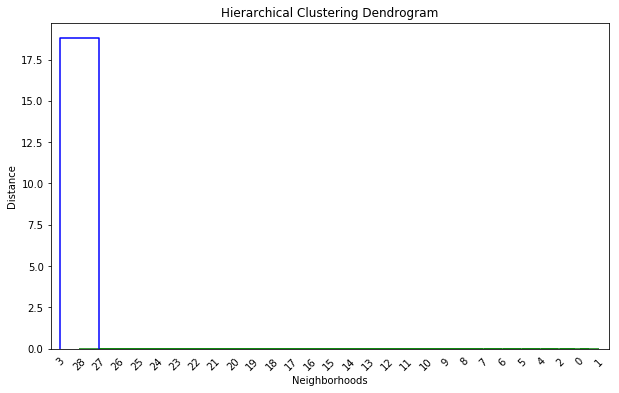

In [40]:
import scipy.cluster.hierarchy as shc

data = venues_grouped.iloc[:,3:]
plt.figure(figsize=(10, 6))   
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Neighborhoods')
plt.ylabel('Distance')
plt.axhline(y=20, c='k')
dend = shc.dendrogram(shc.linkage(data, method='ward'))


According to the above graph, I decide to separate our neighborhoods into 6 clusters (cut at distance of 20, horizontal black line). I will use the hierarchical agglomerative clustering of the sklearn.cluster library to cluster these neighborhoods.

In [41]:
from sklearn.cluster import AgglomerativeClustering

kclusters= 6
cluster = AgglomerativeClustering(n_clusters=kclusters, affinity='euclidean', linkage='ward')  
clusterresult = cluster.fit_predict(data)

venues_grouped['NeighborhoodCluster'] = clusterresult
venues_cluster= df_neighborhood.merge(venues_grouped[['Neighborhood','NeighborhoodCluster']])
venues_cluster =venues_cluster.merge(venues_most[['Neighborhood','1st Most Common Restaurant','2nd Most Common Restaurant','3rd Most Common Restaurant']])
venues_cluster.head()

,Neighborhood,Sector,SectorPopulation,Latitude,Longitude,NeighborhoodCluster,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant
0,Aviației,Sector 1,"225,454",22.30946,73.17993,0,Italian Restaurant,Indian Restaurant,Snack Place
1,Bucureștii Noi,Sector 1,"225,454",22.30946,73.17993,0,Italian Restaurant,Indian Restaurant,Snack Place
2,Centrul Civic,Sector 3,"385,439",22.31044,73.16628,3,Indian Restaurant,Multiplex,Café
3,Cotroceni,Sector 5,"271,575",22.30946,73.17993,0,Italian Restaurant,Indian Restaurant,Snack Place
4,Crângași,Sector 6,"367,760",22.30946,73.17993,0,Italian Restaurant,Indian Restaurant,Snack Place


In [43]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster, sector,SectorPopulation  in zip(venues_cluster['Latitude'], venues_cluster['Longitude'], venues_cluster['Neighborhood'], venues_cluster['NeighborhoodCluster'], venues_cluster['Sector'],venues_cluster['SectorPopulation']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster)+ ' ' + str(sector) + ' ' + str(SectorPopulation), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
folium.Marker(vadodara_center).add_to(map_clusters)
folium.Circle(vadodara_center, radius=2000, fill=False, color='white').add_to(map_clusters)
folium.Circle(vadodara_center, radius=4000, fill=False, color='white').add_to(map_clusters)
folium.Circle(vadodara_center, radius=6000, fill=False, color='white').add_to(map_clusters)
folium.Circle(vadodara_center, radius=10000, fill=False, color='black').add_to(map_clusters)         
map_clusters

In [44]:
print(venues_cluster.groupby(['NeighborhoodCluster','1st Most Common Restaurant' ]).count()[['Neighborhood']].rename(columns={"Neighborhood": "Neighborhood Count"}))

venues_cluster.groupby(['NeighborhoodCluster','2nd Most Common Restaurant' ]).count()[['Neighborhood']].rename(columns={"Neighborhood": "Neighborhood Count"})

                                                Neighborhood Count
NeighborhoodCluster 1st Most Common Restaurant                    
0                   Italian Restaurant                          24
1                   Italian Restaurant                           1
2                   Italian Restaurant                           1
3                   Indian Restaurant                            1
4                   Italian Restaurant                           1
5                   Italian Restaurant                           1


,,Neighborhood Count
NeighborhoodCluster,2nd Most Common Restaurant,
0,Indian Restaurant,24
1,Indian Restaurant,1
2,Indian Restaurant,1
3,Multiplex,1
4,Indian Restaurant,1
5,Indian Restaurant,1


<b>4. Discussion 
    
Cluster 0 has most restaurants. Especially there is no Italian restaurant in west part inluding Cluster 3 . We can think about Cluster 2 , West part

Cluster 0 especially likes Itallian tastes , may be this part will not like any other tastes .


<b>5. Conclusion

<b> This way we have analized the neighbourhood of vadodara city and we have found the details of restaurants,mall,multiplex.From restaurants we got insides about indian restaurants.Italian restaurants,fast food,snacks,cafes categories.After using clustering techniques we got more ideas about italian restaurants. we found clusters,define heat map on it and showed practicle results.Cluster 0 has most restaurants. Especially there is no Italian restaurant in west part inluding Cluster 3 . We can think about Cluster 2 , West part Cluster 0 especially likes Itallian tastes , may be this part will not like any other tastes..
    
so we can set up italian restaurant in cluster 1,2,3,4.
cluster 3 we be most beneficial as it has multiplex area.